In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding="Windows-1252")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
415,ham,Whatsup there. Dont u want to sleep,NaN,NaN,NaN
5198,ham,She.s fine. I have had difficulties with her p...,NaN,NaN,NaN
3665,ham,I'm turning off my phone. My moms telling ever...,NaN,NaN,NaN
3603,ham,Hey morning what you come to ask:-) pa...,NaN,NaN,NaN
1697,ham,Hai priya are you right. What doctor said pa. ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
4529,ham,Don't forget though that I love you .... And I...
2811,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
5373,ham,"K I'll head out in a few mins, see you there"
662,ham,Sorry me going home first... Daddy come fetch ...
2476,ham,i dnt wnt to tlk wid u


In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1650,ham,I dont have any of your file in my bag..i was ...
1941,spam,WELL DONE! Your 4* Costa Del Sol Holiday or å£...
475,ham,Ok I'm gonna head up to usf in like fifteen mi...
483,ham,Thank you baby! I cant wait to taste the real ...
3696,spam,You are a winner you have been specially selec...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
4739,0,"I keep seeing weird shit and bein all \woah\"" ..."
1291,0,Hey babe! I saw you came online for a second a...
2685,1,URGENT! We are trying to contact U. Todays dra...
1064,0,"That's fine, I'll bitch at you about it later ..."
1637,1,"0A$NETWORKS allow companies to bill for SMS, s..."


In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

403

In [14]:
#remove duplicates
df = df.drop_duplicates(keep='first')


In [15]:
df.duplicated().sum()

0

2.EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x25406ae9348>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

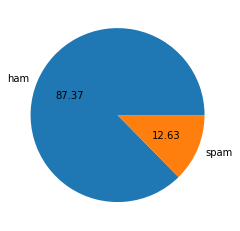

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

Data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters']= df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#num of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
#num of sentences
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [27]:
#describe for ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
#describe for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [29]:
#histogram
import seaborn as sns

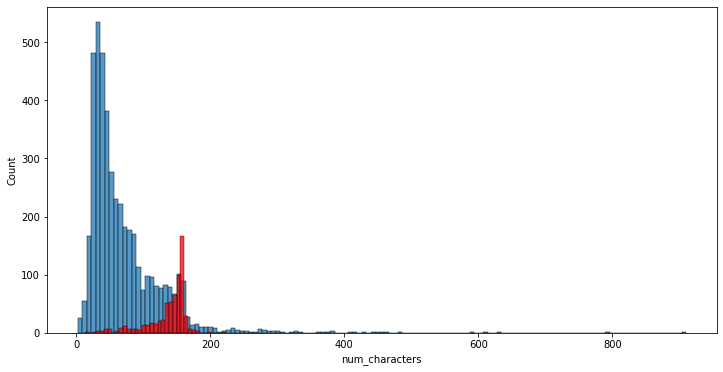

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

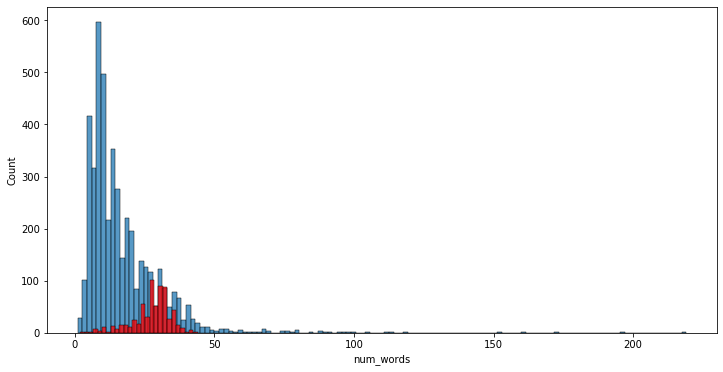

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

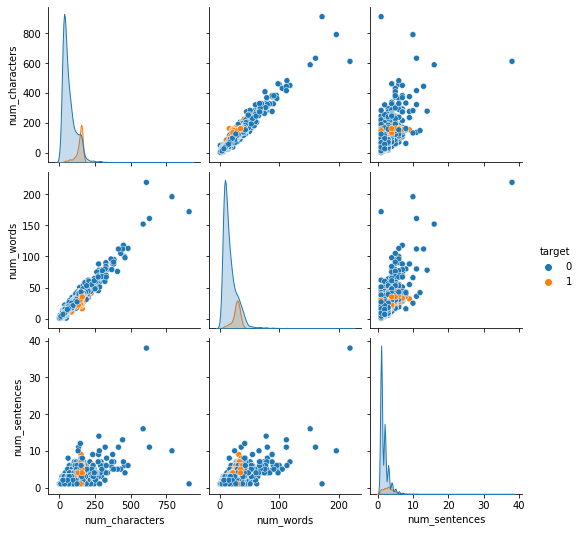

In [32]:
sns.pairplot(df,hue='target')

In [33]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.264160,0.267602
num_characters,0.384717,1.000000,0.965309,0.626118
num_words,0.264160,0.965309,1.000000,0.683584
num_sentences,0.267602,0.626118,0.683584,1.000000


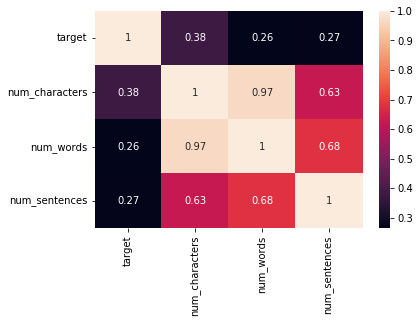

In [34]:
sns.heatmap(df.corr(),annot=True)

3.Data Preprocessing<br>
<br>
Lower case <br>
Tokenization <br>
Removing special characters <br>
Removing stop words and punctuation <br>
Stemming <br>


In [35]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

def transform_text(text):
    #converting to lowercase
    text = text.lower()

    #tokenization:splitting into words
    text = nltk.word_tokenize(text)
    
    #removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    #removing stopwords

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
   
   #stemming
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    

    return " ".join(y)

In [36]:
transform_text('I loved the youtube lectures on Machine Learning. how about you ?')

'love youtub lectur machin learn'

In [37]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
#applying on text column
df['transform_text']= df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
#wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

In [42]:
spam_wc

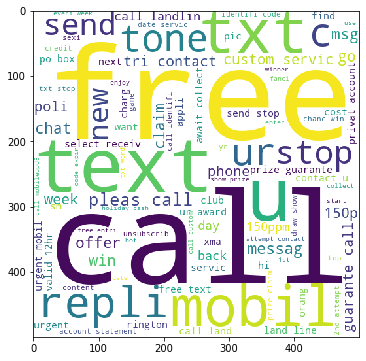

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
ham_wc

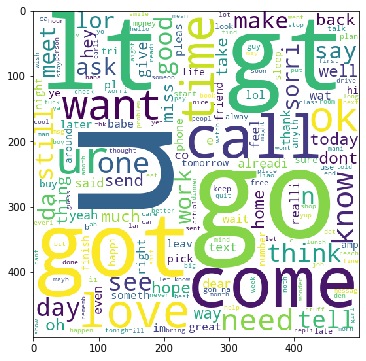

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9883

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


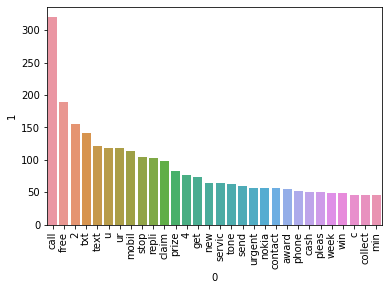

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [49]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

34773

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


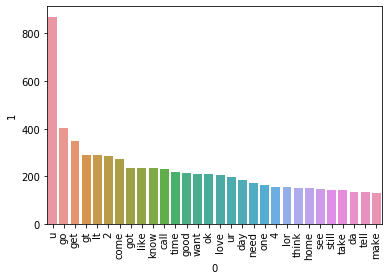

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


Model Building

In [182]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [183]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [184]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [186]:
#appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [187]:
X.shape

(5169, 3001)

In [188]:
y= df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [191]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [192]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [193]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8887814313346228
[[799  97]
 [ 18 120]]
0.5529953917050692


In [194]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[889   7]
 [ 24 114]]
0.9421487603305785


In [195]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


tfidf with mnb is giving best possible model(with best precision score)

However,we train the data with other models and check their performance 

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [197]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [198]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [199]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [200]:
train_classifier(svc,X_train,y_train,X_test,y_test)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [201]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8868471953578336
Precision -  0.9565217391304348
For  NB
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8703703703703703
For  LR
Accuracy -  0.965183752417795
Precision -  0.9553571428571429
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.912
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9495798319327731


In [202]:
list1 = [key for key in clfs]
list1

['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb']

In [203]:
performance_df = pd.DataFrame({'Algorithm':list1,'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.977756,0.983193
5,RF,0.972921,0.982456
1,KN,0.886847,0.956522
4,LR,0.965184,0.955357
10,xgb,0.970019,0.949580
2,NB,0.970019,0.942149
6,AdaBoost,0.969052,0.941667
9,GBDT,0.949710,0.930000
7,BgC,0.966151,0.912000
3,DT,0.943907,0.870370


In [204]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.977756
1,RF,Accuracy,0.972921
2,KN,Accuracy,0.886847
3,LR,Accuracy,0.965184
4,xgb,Accuracy,0.970019
5,NB,Accuracy,0.970019
6,AdaBoost,Accuracy,0.969052
7,GBDT,Accuracy,0.949710
8,BgC,Accuracy,0.966151
9,DT,Accuracy,0.943907


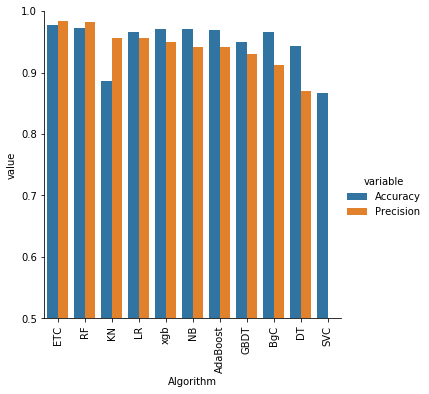

In [205]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [206]:
# model improve
# 1. Change the max_features parameter of TfIdf
# 2. Min max Scaling
# 3. adding number of characters for training 

In [207]:
temp_df1 = pd.DataFrame({'Algorithm':list1,'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [208]:
temp_df2 = pd.DataFrame({'Algorithm':list1,'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [209]:
new_df = performance_df.merge(temp_df1,on='Algorithm')
new_df


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,ETC,0.977756,0.983193,0.977756,0.983193
1,RF,0.972921,0.982456,0.972921,0.982456
2,KN,0.886847,0.956522,0.886847,0.956522
3,LR,0.965184,0.955357,0.965184,0.955357
4,xgb,0.970019,0.949580,0.970019,0.949580
5,NB,0.970019,0.942149,0.970019,0.942149
6,AdaBoost,0.969052,0.941667,0.969052,0.941667
7,GBDT,0.949710,0.930000,0.949710,0.930000
8,BgC,0.966151,0.912000,0.966151,0.912000
9,DT,0.943907,0.870370,0.943907,0.870370


In [210]:
new_df_scaled = new_df.merge(temp_df2,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,ETC,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,KN,0.886847,0.956522,0.886847,0.956522,0.886847,0.956522
3,LR,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357
4,xgb,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580
5,NB,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
6,AdaBoost,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667
7,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
8,BgC,0.966151,0.912000,0.966151,0.912000,0.966151,0.912000
9,DT,0.943907,0.870370,0.943907,0.870370,0.943907,0.870370


In [211]:
temp_df3 = pd.DataFrame({'Algorithm':list1,'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [213]:
new_df_scaled_num = new_df_scaled.merge(temp_df3,on='Algorithm')
new_df_scaled_num


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,ETC,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,KN,0.886847,0.956522,0.886847,0.956522,0.886847,0.956522,0.886847,0.956522
3,LR,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357
4,xgb,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580
5,NB,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
6,AdaBoost,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667
7,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
8,BgC,0.966151,0.912000,0.966151,0.912000,0.966151,0.912000,0.966151,0.912000
9,DT,0.943907,0.870370,0.943907,0.870370,0.943907,0.870370,0.943907,0.870370


Tfidf vectorizer with max features has best performance compared with the other improvement methods

Now we perform voting classifier which is basically combining my best performing models and training

In [214]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [215]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [216]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1.0, kernel='sigmoid', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('nb',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)),
                             ('et',
                              ExtraTreesClassifier...
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_

In [217]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 1.0


Since Precision is very good for this model, So we can consider this model 

In [218]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [219]:

from sklearn.ensemble import StackingClassifier

In [220]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [221]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9534883720930233


Since the precision is going down, lets not consider stacking 

In [223]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))